In [36]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.result_utils import *
root = '/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# clavius/model_0 

In [7]:
model0 = get_result(os.path.join(root,'model_0'),hp = ['hiddens','lr','reg'])

In [9]:
model0g = model0.groupby('hiddens')

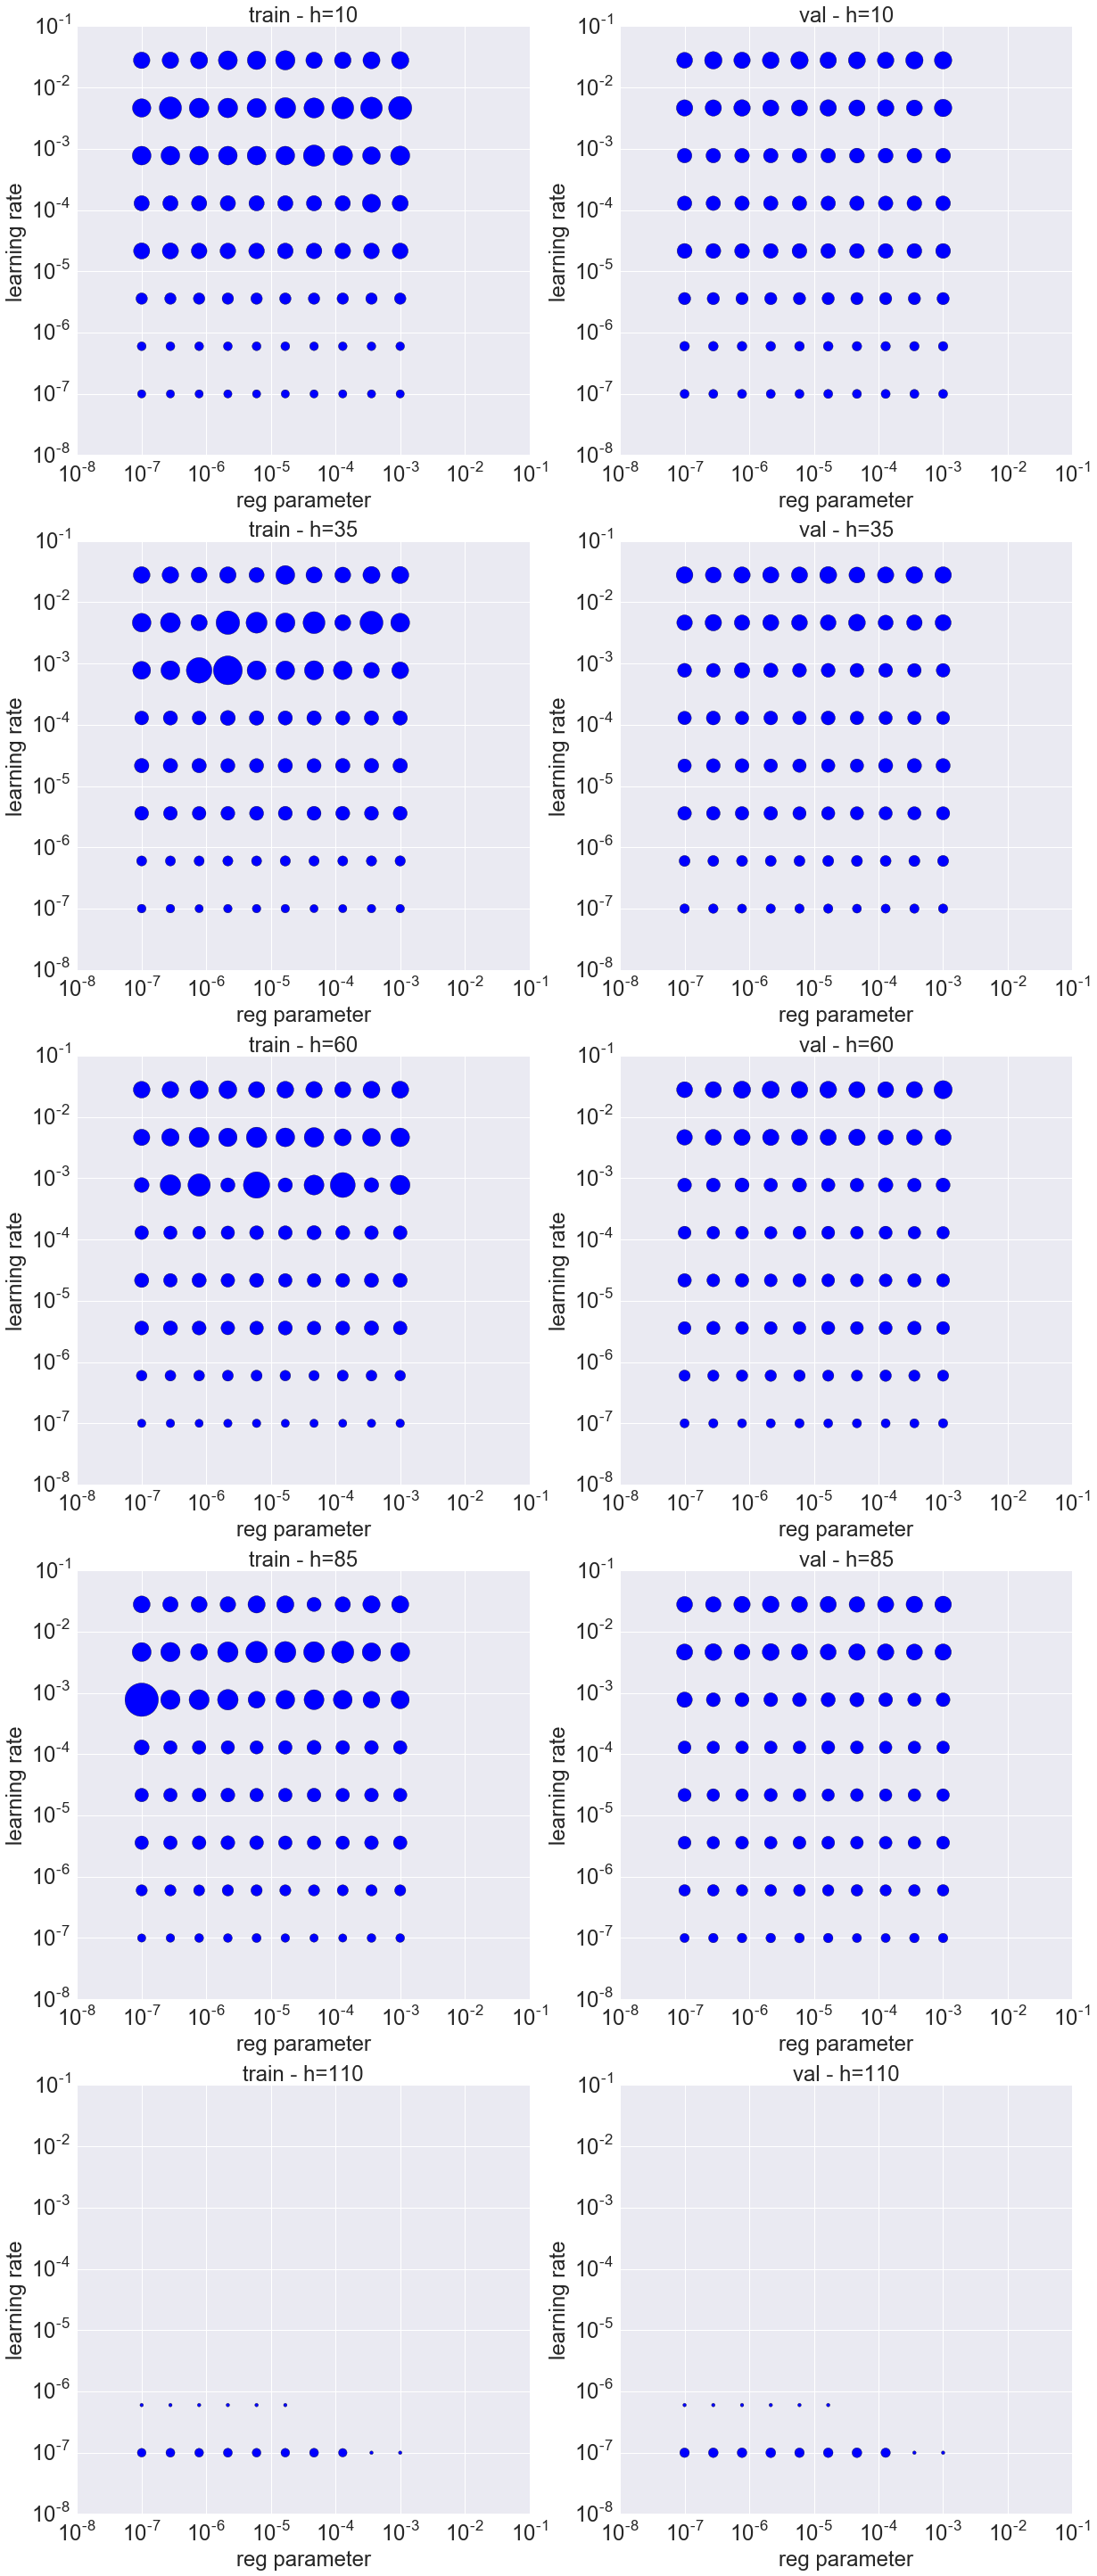

In [46]:
fig = plt.figure(figsize=(20, model0g.ngroups * 10))
gs = gridspec.GridSpec(model0g.ngroups, 2)
for i,(h,gp) in enumerate(model0g):
    ax = plt.subplot(gs[i, 0])
    ax.scatter(gp.reg,gp.lr,s =1500./gp.train)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('reg parameter',fontsize = 24)
    ax.set_ylabel('learning rate',fontsize=24)
    ax.set_title('train - h=%d'%(h),fontsize=24)
    ax.set_xlim(1e-8,1e-1)
    ax.set_ylim(1e-8,1e-1)
    ax.tick_params(labelsize=24)
    ax = plt.subplot(gs[i, 1])
    ax.scatter(gp.reg,gp.lr,s = 1500./gp.val)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('reg parameter',fontsize = 24)
    ax.set_ylabel('learning rate',fontsize=24)
    ax.set_title('val - h=%d'%(h),fontsize=24)
    ax.tick_params(labelsize=24)
    ax.set_xlim(1e-8,1e-1)
    ax.set_ylim(1e-8,1e-1)
    

# clavius/model_1

In [64]:
base_model = os.path.join(root,'model_1')

In [53]:
model1 = get_result(base_model,hp = ['hiddens','lr','reg','nb_layers','update_rule','stride'])

In [66]:
from PIL import Image

In [62]:
model1.iloc[0]

root           /Users/thorey/Documents/project/competition/fo...
model          hiddens_200_seq_length_200_update_rule_rmsprop...
hiddens                                                      200
lr                                                          0.01
reg                                                            0
nb_layers                                                      2
update_rule                                              rmsprop
stride                                                         2
train                                                      1.239
val                                                        1.719
Name: 0, dtype: object

In [67]:
def show_learning(model):
    im = Image.open(os.path.join(model,'model_history.png'))
    im.show()

In [73]:
show_learning(os.path.join(base_model,model1.iloc[1].model))

In [71]:
from utils.train_utils import *

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [72]:
config = parse_conf_file(os.path.join(base_model,model1.iloc[0].model,'conf_model.json'))
model = Model(config,mode = 'inspection')

{'hiddens': 200, 'lr': 0.01, 'reg': 0.0}
Loading the prepro pipeline : [u'MyImputer', u'MyStandardScaler']
Loading data iterator using : benchmark
Le train is composed by 21 group and 3738 observation
Le val is composed by 8 group and 1112 observation
Le test is composed by 5 group and 948 observation
Build the architecture: lstm, lstm
Initialize the network 
Loading model params from /Users/clement/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0/model.pkl


IOError: [Errno 2] No such file or directory: u'/Users/clement/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0/model.pkl'

In [76]:
os.path.expanduser(config['folder'])

u'/Users/clement/Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0'

In [85]:
os.path.expanduser(os.path.join(*config['folder'].split('/')[3:]))

u'Documents/project/competition/fognet/models/clavius/lstm/model_1/hiddens_200_seq_length_200_update_rule_rmsprop_stride_2_lr_0.01_nb_layers_2_reg_0.0'

In [87]:
home = os.path.expanduser(os.getcwd)

AttributeError: 'builtin_function_or_method' object has no attribute 'startswith'

In [91]:
os.path.expanduser('~/dez')

'/Users/thorey/dez'

In [92]:
fognet = os.path.join('~', 'Documents', 'project', 'competition', 'fognet')

In [93]:
fognet

'~/Documents/project/competition/fognet'

In [94]:
os.path.expanduser(fognet)

'/Users/thorey/Documents/project/competition/fognet'